In [1]:
import scanpy as sc
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scvi
import torch
from scipy import stats
from adjustText import adjust_text  # pip install adjustText

In [2]:
import warnings
warnings.simplefilter("ignore", FutureWarning)
warnings.simplefilter("ignore", UserWarning)
warnings.simplefilter("ignore", RuntimeWarning)

In [3]:
adata = sc.read('annotated.h5ad')
adata.obs

,samples,condition,location,n_genes,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_20_genes,pct_counts_mt,pct_counts_ribo,pct_counts_hb,low_label,low_score,_scvi_batch,_scvi_labels,overcluster,low_major,Cell_Type
711_AAACCCAAGTCGGGAT-1,711,Tumor,Right,707,707,6.562444,1396.0,7.242083,26.862464,10.100286,25.716331,0.000000,T follicular helper cells,0.103311,0,0,14,CD4+ T cells,CD4+ T Cells
711_AAACCCACAGAGGAAA-1,711,Tumor,Right,838,838,6.732211,1504.0,7.316548,23.803191,9.441490,13.962767,0.000000,Unknown,0.236022,0,0,11,CD4+ T cells,CD4+ T Cells
711_AAACCCACATGATAGA-1,711,Tumor,Right,435,435,6.077642,613.0,6.419995,17.781403,0.815661,18.270800,0.000000,Unknown,0.400460,0,0,36,CMS3,CMS3
711_AAACCCAGTCTCGCGA-1,711,Tumor,Right,579,579,6.363028,860.0,6.758094,23.255814,15.465117,6.395349,0.000000,Tip-like ECs,0.966648,0,0,28,Tip-like ECs,Tip-like ECs
711_AAACGAAGTTATCTTC-1,711,Tumor,Right,1384,1384,7.233455,2629.0,7.874739,19.246862,8.178015,15.405098,0.000000,gamma delta T cells,0.993837,0,0,15,CD8+ T cells,CD8+ T cells
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
706_TTTGGTTCAAACACCT-1,706,Tumor,Left,1815,1815,7.504392,4944.0,8.506132,21.318770,1.961974,21.318771,0.020227,CD8+ T cells,0.999997,0,0,1,CD8+ T cells,CD8+ T cells
706_TTTGGTTCAACGGGTA-1,706,Tumor,Left,909,909,6.813445,3528.0,8.168770,34.722222,0.368481,25.368483,0.000000,Pro-inflammatory,0.549964,0,0,12,SPP1+,Spp1+
706_TTTGGTTTCTATCGCC-1,706,Tumor,Left,4658,4658,8.446556,23600.0,10.069044,17.559322,3.237288,18.135593,0.004237,Stromal 2,0.961222,0,0,25,Stromal 2,Stromal 2
706_TTTGTTGCATCAGCGC-1,706,Tumor,Left,374,374,5.926926,686.0,6.532334,23.032070,10.932944,33.236153,0.000000,CMS2,0.978673,0,0,10,CMS2,CMS2


In [4]:
    print("\nCell type distribution:")
    print(adata.obs['Cell_Type'].value_counts())
    
    print("\nSample distribution:")
    print(adata.obs['location'].value_counts())  # 'left' or 'right'
    
    print("\nTumor vs Normal distribution:")
    print(adata.obs['condition'].value_counts())  # 'tumor' or 'normal'


Cell type distribution:
Cell_Type
CD4+ T Cells                    17357
B Cells                         10774
CD8+ T cells                     6676
Regulatory T Cells               3907
CMS3                             3876
Helper 17 T cells                2377
CMS2                             1792
Spp1+                            1634
Follicular helper T cells        1486
Dendritic cells                  1362
Gamma delta T cells              1336
NK cells                         1320
Stromal 2                         897
Mast cells                        642
Tip-like ECs                      610
Dentritic cells                   573
Pericytes                         457
Mature Enterocytes type 2         326
Plasma Cells                      240
cDC                               170
Plasmacytoid Dendritic Cells       89
Stromal 3                          65
Enteric glia cells                 49
Name: count, dtype: int64

Sample distribution:
location
Left     32344
Right    25671
Name

In [5]:
#model = scvi.model.SCVI.load('the_model/', adata_tumor)
#model

# DE

In [6]:
#subsetting
adata_tumor =adata.copy()
adata_tumor = adata_tumor[adata_tumor.obs['condition'] == 'Tumor'].copy()
adata_tumor

AnnData object with n_obs × n_vars = 43640 × 14469
    obs: 'samples', 'condition', 'location', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'pct_counts_mt', 'pct_counts_ribo', 'pct_counts_hb', 'low_label', 'low_score', '_scvi_batch', '_scvi_labels', 'overcluster', 'low_major', 'Cell_Type'
    var: 'n_cells'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'log1p', 'low_major_colors', 'neighbors', 'overcluster', 'rank_genes_groups', 'umap'
    obsm: 'X_scVI', 'X_umap', '_scvi_extra_categorical_covs', '_scvi_extra_continuous_covs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [8]:
scvi.model.SCVI.setup_anndata(
    adata_tumor,
    layer='counts',
    batch_key='samples',      # Technical batch correction
    categorical_covariate_keys=["location"],
    continuous_covariate_keys=None)

In [9]:
print("\nTraining scVI model on tumor cells...")
model_tumor = scvi.model.SCVI(
    adata_tumor,
    n_latent=30,
    n_layers=2,
    gene_likelihood="nb"  # negative binomial
)

model_tumor.train(
    max_epochs=400,
    early_stopping=True,
    train_size=0.9
)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Training scVI model on tumor cells...


Training:   0%|          | 0/400 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=400` reached.


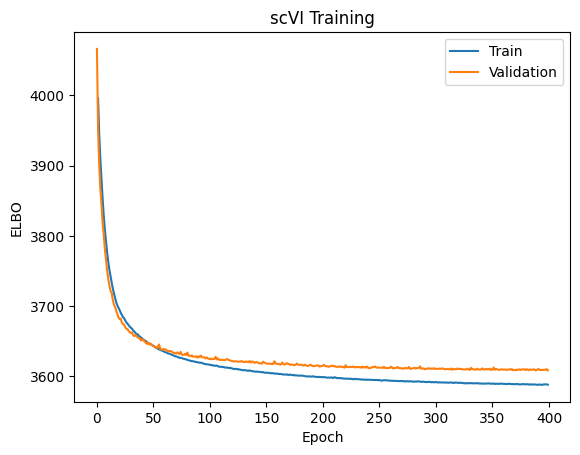

In [10]:
train_elbo = model_tumor.history['elbo_train'][1:]
valid_elbo = model_tumor.history['elbo_validation']


plt.plot(train_elbo, label='Train')
plt.plot(valid_elbo, label='Validation')
plt.xlabel('Epoch')
plt.ylabel('ELBO')
plt.legend()
plt.title('scVI Training')
plt.show()

In [11]:
cell_types = adata_tumor.obs['Cell_Type'].unique()

all_de_results = {}

for cell_type in cell_types:
    print(f"\nRunning DE for {cell_type}...")
    
    # Subset to this cell type
    cell_mask = adata_tumor.obs['Cell_Type'] == cell_type
    
    # Check if both locations exist
    ct_locations = adata_tumor.obs.loc[cell_mask, 'location'].unique()
    if len(ct_locations) < 2:
        print(f"  Skipping - only {ct_locations} present")
        continue
    
    # Run DE
    de_df = model_tumor.differential_expression(
        adata_tumor[cell_mask],
        groupby='location',
        group1='Left',
        group2='Right',
          # effect size threshold (log2FC)
        batch_correction=True,
        mode ='change'
    )
    
    de_df['Cell_Type'] = cell_type
    all_de_results[cell_type] = de_df
    
    print(f"  Found {len(de_df)} genes")

# 6. Combine and filter results
all_de = pd.concat(all_de_results.values(), ignore_index=True)

# Filter significant genes
sig_de = all_de[
    (all_de['is_de_fdr_0.05'] == True) &  # FDR < 0.05
    (all_de['lfc_median'].abs() > 0.5)     # |log2FC| > 0.5
]

print(f"\nTotal significant DEGs: {len(sig_de)}")
print(f"\nDEGs per cell type:")
print(sig_de.groupby('Cell_Type').size())

# Save results
sig_de.to_csv('scvi_degs_left_vs_right_tumor.csv', index=False)



Running DE for CD4+ T Cells...
INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


DE...:   0%|          | 0/1 [00:00<?, ?it/s]

  Found 14469 genes

Running DE for CMS3...
INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


DE...:   0%|          | 0/1 [00:00<?, ?it/s]

  Found 14469 genes

Running DE for Tip-like ECs...
INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


DE...:   0%|          | 0/1 [00:00<?, ?it/s]

  Found 14469 genes

Running DE for CD8+ T cells...
INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


DE...:   0%|          | 0/1 [00:00<?, ?it/s]

  Found 14469 genes

Running DE for B Cells...
INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


DE...:   0%|          | 0/1 [00:00<?, ?it/s]

  Found 14469 genes

Running DE for Spp1+...
INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


DE...:   0%|          | 0/1 [00:00<?, ?it/s]

  Found 14469 genes

Running DE for Mast cells...
INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


DE...:   0%|          | 0/1 [00:00<?, ?it/s]

  Found 14469 genes

Running DE for Stromal 2...
INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


DE...:   0%|          | 0/1 [00:00<?, ?it/s]

  Found 14469 genes

Running DE for CMS2...
INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


DE...:   0%|          | 0/1 [00:00<?, ?it/s]

  Found 14469 genes

Running DE for Regulatory T Cells...
INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


DE...:   0%|          | 0/1 [00:00<?, ?it/s]

  Found 14469 genes

Running DE for Pericytes...
INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


DE...:   0%|          | 0/1 [00:00<?, ?it/s]

  Found 14469 genes

Running DE for Dendritic cells...
INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


DE...:   0%|          | 0/1 [00:00<?, ?it/s]

  Found 14469 genes

Running DE for Gamma delta T cells...
INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


DE...:   0%|          | 0/1 [00:00<?, ?it/s]

  Found 14469 genes

Running DE for Dentritic cells...
INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


DE...:   0%|          | 0/1 [00:00<?, ?it/s]

  Found 14469 genes

Running DE for Helper 17 T cells...
INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


DE...:   0%|          | 0/1 [00:00<?, ?it/s]

  Found 14469 genes

Running DE for Mature Enterocytes type 2...
INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


DE...:   0%|          | 0/1 [00:00<?, ?it/s]

  Found 14469 genes

Running DE for NK cells...
INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


DE...:   0%|          | 0/1 [00:00<?, ?it/s]

  Found 14469 genes

Running DE for Plasma Cells...
INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


DE...:   0%|          | 0/1 [00:00<?, ?it/s]

  Found 14469 genes

Running DE for Stromal 3...
INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


DE...:   0%|          | 0/1 [00:00<?, ?it/s]

  Found 14469 genes

Running DE for cDC...
INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


DE...:   0%|          | 0/1 [00:00<?, ?it/s]

  Found 14469 genes

Running DE for Plasmacytoid Dendritic Cells...
INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


DE...:   0%|          | 0/1 [00:00<?, ?it/s]

  Found 14469 genes

Running DE for Follicular helper T cells...
INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


DE...:   0%|          | 0/1 [00:00<?, ?it/s]

  Found 14469 genes

Running DE for Enteric glia cells...
INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


DE...:   0%|          | 0/1 [00:00<?, ?it/s]

  Found 14469 genes

Total significant DEGs: 5

DEGs per cell type:
Cell_Type
Follicular helper T cells    1
Stromal 3                    4
dtype: int64


In [13]:
scvi_de = model_tumor.differential_expression(
    idx1= [(adata_tumor.obs['Cell_Type']=='CD4+ T Cells') & (adata_tumor.obs.location=='Left')] ,
    idx2= [(adata_tumor.obs['Cell_Type']=='CD4+ T Cells') & (adata_tumor.obs.location=='Right')] ,
      mode ='change'     )
scvi_de

DE...:   0%|          | 0/1 [00:00<?, ?it/s]

,proba_de,proba_not_de,bayes_factor,scale1,scale2,pseudocounts,delta,lfc_mean,lfc_median,lfc_std,lfc_min,lfc_max,raw_mean1,raw_mean2,non_zeros_proportion1,non_zeros_proportion2,raw_normalized_mean1,raw_normalized_mean2,is_de_fdr_0.05
JUN,0.8368,0.1632,1.634609,4.331885e-03,8.842791e-04,0.000147,0.25,2.666280,2.592771,2.393336,-4.755767,9.420946,15.412923,3.034505,0.876490,0.544434,48.648430,10.016315,False
HSPA1A,0.7842,0.2158,1.290312,4.095456e-03,1.467123e-03,0.000147,0.25,3.361620,3.696746,3.578381,-8.228440,11.251787,13.810975,4.290368,0.698566,0.341797,44.600971,15.152034,False
HSPA1B,0.7790,0.2210,1.259848,2.219112e-03,8.974504e-04,0.000147,0.25,3.208300,3.656090,3.495158,-10.105749,11.199746,7.202810,2.404128,0.674210,0.278809,22.885612,9.832756,False
DNAJB1,0.7586,0.2414,1.145019,3.733901e-03,1.070775e-03,0.000147,0.25,2.328536,2.186566,2.861099,-6.822842,10.526701,12.168182,3.453453,0.834686,0.572917,37.533955,11.045882,False
IER2,0.7376,0.2624,1.033532,6.275203e-04,2.281851e-04,0.000147,0.25,1.553415,1.510711,1.769710,-4.112187,7.821681,1.982864,0.745118,0.594576,0.354980,6.641601,2.400707,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NLN,0.0000,1.0000,-0.000000,7.942656e-07,7.701851e-07,0.000147,0.25,0.031309,0.048815,1.093766,-4.219500,4.968819,0.002937,0.002279,0.002937,0.002279,0.007481,0.009051,False
TUT1,0.0000,1.0000,-0.000000,2.294643e-06,2.503123e-06,0.000147,0.25,0.082771,0.144985,1.745947,-5.387803,5.463822,0.007082,0.006836,0.007082,0.006673,0.026883,0.027267,False
FAM20A,0.0000,1.0000,-0.000000,2.570469e-07,1.581668e-07,0.000147,0.25,0.339733,0.310884,0.937653,-5.650539,5.665625,0.000691,0.000163,0.000691,0.000163,0.003248,0.000495,False
ROM1,0.0000,1.0000,-0.000000,2.126720e-06,1.176243e-06,0.000147,0.25,0.873177,0.895153,0.969573,-2.425638,3.804621,0.007082,0.003092,0.007082,0.003092,0.022780,0.011549,False


In [14]:
scvi_de = scvi_de[(abs(scvi_de.lfc_mean)>.5)]
scvi_de = scvi_de.sort_values('lfc_mean')
scvi_de

,proba_de,proba_not_de,bayes_factor,scale1,scale2,pseudocounts,delta,lfc_mean,lfc_median,lfc_std,lfc_min,lfc_max,raw_mean1,raw_mean2,non_zeros_proportion1,non_zeros_proportion2,raw_normalized_mean1,raw_normalized_mean2,is_de_fdr_0.05
IGLC2,0.5518,0.4482,-0.207946,0.000093,0.000202,0.000147,0.25,-3.032137,-3.153566,3.863193,-11.132030,10.009620,0.221799,0.634279,0.114182,0.291504,0.816853,1.986126,False
IGHA2,0.5994,0.4006,-0.402966,0.000033,0.000092,0.000147,0.25,-2.822562,-3.247766,2.445811,-8.460089,7.890988,0.082916,0.264324,0.062878,0.200684,0.316663,0.955718,False
JCHAIN,0.7322,0.2678,-1.005813,0.000032,0.000135,0.000147,0.25,-2.619541,-2.852443,2.146391,-9.091952,6.508286,0.083434,0.327636,0.065642,0.222982,0.308662,1.421885,False
IGKC,0.6854,0.3146,-0.778701,0.000400,0.000696,0.000147,0.25,-2.558769,-2.888968,3.479077,-9.650201,10.037398,1.021933,2.063648,0.236138,0.537923,3.672967,6.972730,False
IGLC3,0.4338,0.5662,0.266364,0.000048,0.000058,0.000147,0.25,-2.475945,-2.743786,3.847047,-11.442799,10.510284,0.128520,0.185059,0.069442,0.105306,0.435050,0.682396,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
JUN,0.8368,0.1632,1.634609,0.004332,0.000884,0.000147,0.25,2.666280,2.592771,2.393336,-4.755767,9.420946,15.412923,3.034505,0.876490,0.544434,48.648430,10.016315,False
EGR1,0.6594,0.3406,0.660622,0.000559,0.000063,0.000147,0.25,2.937183,3.094418,3.336178,-9.201432,12.356892,1.822578,0.163412,0.360166,0.071777,5.720021,0.746600,False
HSPA1B,0.7790,0.2210,1.259848,0.002219,0.000897,0.000147,0.25,3.208300,3.656090,3.495158,-10.105749,11.199746,7.202810,2.404128,0.674210,0.278809,22.885612,9.832756,False
HSPA1A,0.7842,0.2158,1.290312,0.004095,0.001467,0.000147,0.25,3.361620,3.696746,3.578381,-8.228440,11.251787,13.810975,4.290368,0.698566,0.341797,44.600971,15.152034,False


In [22]:
# Bayes Factor is scVI's measure of evidence for differential expression
# BF > 3 is considered "substantial evidence"
# BF > 10 is "strong evidence"

for cell_type in cell_types:
    print(f"\nAnalyzing {cell_type}...")
    
    cell_mask = adata_tumor.obs['Cell_Type'] == cell_type
    ct_locations = adata_tumor.obs.loc[cell_mask, 'location'].unique()
    
    if len(ct_locations) < 2:
        print(f"  Skipping - only {ct_locations} present")
        continue
    
    de_df1 = model_tumor.differential_expression(
        adata_tumor[cell_mask],
        groupby='location',
        group1='Left',
        group2='Right',
        delta=0.25,  # Lower threshold
        batch_correction=True,
        mode ='change'
    )
    
    # Filter by Bayes Factor instead of FDR
    sig_genes1 = de_df1[
        (de_df1['bayes_factor'] > 3) &  # Substantial evidence (more lenient: > 1.5)
        (de_df1['lfc_median'].abs() > 0.25)  # Lower fold change threshold
    ].copy()
    
    sig_genes1['Cell_Type'] = cell_type
    all_de_results[cell_type] = sig_genes1
    
    print(f"  Bayes Factor > 3: {len(sig_genes1)} genes")
    print(f"  Bayes Factor > 8: {(de_df1['bayes_factor'] > 8).sum()} genes")
    print(f"  Bayes Factor > 9: {(de_df1['bayes_factor'] > 9).sum()} genes")
    print(f"  Bayes Factor > 10: {(de_df1['bayes_factor'] > 10).sum()} genes")
    print(f"  Bayes Factor > 1.5: {(de_df1['bayes_factor'] > 1.5).sum()} genes")


Analyzing CD4+ T Cells...
INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


DE...:   0%|          | 0/1 [00:00<?, ?it/s]

  Bayes Factor > 3: 1442 genes
  Bayes Factor > 8: 372 genes
  Bayes Factor > 9: 0 genes
  Bayes Factor > 10: 0 genes
  Bayes Factor > 1.5: 5240 genes

Analyzing CMS3...
INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


DE...:   0%|          | 0/1 [00:00<?, ?it/s]

  Bayes Factor > 3: 2546 genes
  Bayes Factor > 8: 230 genes
  Bayes Factor > 9: 0 genes
  Bayes Factor > 10: 0 genes
  Bayes Factor > 1.5: 6699 genes

Analyzing Tip-like ECs...
INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


DE...:   0%|          | 0/1 [00:00<?, ?it/s]

  Bayes Factor > 3: 763 genes
  Bayes Factor > 8: 161 genes
  Bayes Factor > 9: 0 genes
  Bayes Factor > 10: 0 genes
  Bayes Factor > 1.5: 5272 genes

Analyzing CD8+ T cells...
INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


DE...:   0%|          | 0/1 [00:00<?, ?it/s]

  Bayes Factor > 3: 1794 genes
  Bayes Factor > 8: 395 genes
  Bayes Factor > 9: 0 genes
  Bayes Factor > 10: 0 genes
  Bayes Factor > 1.5: 6302 genes

Analyzing B Cells...
INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


DE...:   0%|          | 0/1 [00:00<?, ?it/s]

  Bayes Factor > 3: 1251 genes
  Bayes Factor > 8: 392 genes
  Bayes Factor > 9: 0 genes
  Bayes Factor > 10: 0 genes
  Bayes Factor > 1.5: 5365 genes

Analyzing Spp1+...
INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


DE...:   0%|          | 0/1 [00:00<?, ?it/s]

  Bayes Factor > 3: 1559 genes
  Bayes Factor > 8: 189 genes
  Bayes Factor > 9: 0 genes
  Bayes Factor > 10: 0 genes
  Bayes Factor > 1.5: 6612 genes

Analyzing Mast cells...
INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


DE...:   0%|          | 0/1 [00:00<?, ?it/s]

  Bayes Factor > 3: 1915 genes
  Bayes Factor > 8: 288 genes
  Bayes Factor > 9: 0 genes
  Bayes Factor > 10: 0 genes
  Bayes Factor > 1.5: 6927 genes

Analyzing Stromal 2...
INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


DE...:   0%|          | 0/1 [00:00<?, ?it/s]

  Bayes Factor > 3: 844 genes
  Bayes Factor > 8: 116 genes
  Bayes Factor > 9: 0 genes
  Bayes Factor > 10: 0 genes
  Bayes Factor > 1.5: 5476 genes

Analyzing CMS2...
INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


DE...:   0%|          | 0/1 [00:00<?, ?it/s]

  Bayes Factor > 3: 2107 genes
  Bayes Factor > 8: 193 genes
  Bayes Factor > 9: 0 genes
  Bayes Factor > 10: 0 genes
  Bayes Factor > 1.5: 6952 genes

Analyzing Regulatory T Cells...
INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


DE...:   0%|          | 0/1 [00:00<?, ?it/s]

  Bayes Factor > 3: 1227 genes
  Bayes Factor > 8: 274 genes
  Bayes Factor > 9: 0 genes
  Bayes Factor > 10: 0 genes
  Bayes Factor > 1.5: 6059 genes

Analyzing Pericytes...
INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


DE...:   0%|          | 0/1 [00:00<?, ?it/s]

  Bayes Factor > 3: 905 genes
  Bayes Factor > 8: 126 genes
  Bayes Factor > 9: 0 genes
  Bayes Factor > 10: 0 genes
  Bayes Factor > 1.5: 4796 genes

Analyzing Dendritic cells...
INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


DE...:   0%|          | 0/1 [00:00<?, ?it/s]

  Bayes Factor > 3: 2279 genes
  Bayes Factor > 8: 199 genes
  Bayes Factor > 9: 0 genes
  Bayes Factor > 10: 0 genes
  Bayes Factor > 1.5: 6636 genes

Analyzing Gamma delta T cells...
INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


DE...:   0%|          | 0/1 [00:00<?, ?it/s]

  Bayes Factor > 3: 1495 genes
  Bayes Factor > 8: 227 genes
  Bayes Factor > 9: 0 genes
  Bayes Factor > 10: 0 genes
  Bayes Factor > 1.5: 5982 genes

Analyzing Dentritic cells...
INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


DE...:   0%|          | 0/1 [00:00<?, ?it/s]

  Bayes Factor > 3: 1077 genes
  Bayes Factor > 8: 201 genes
  Bayes Factor > 9: 0 genes
  Bayes Factor > 10: 0 genes
  Bayes Factor > 1.5: 3273 genes

Analyzing Helper 17 T cells...
INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


DE...:   0%|          | 0/1 [00:00<?, ?it/s]

  Bayes Factor > 3: 1598 genes
  Bayes Factor > 8: 311 genes
  Bayes Factor > 9: 0 genes
  Bayes Factor > 10: 0 genes
  Bayes Factor > 1.5: 6060 genes

Analyzing Mature Enterocytes type 2...
INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


DE...:   0%|          | 0/1 [00:00<?, ?it/s]

  Bayes Factor > 3: 2111 genes
  Bayes Factor > 8: 207 genes
  Bayes Factor > 9: 0 genes
  Bayes Factor > 10: 0 genes
  Bayes Factor > 1.5: 4700 genes

Analyzing NK cells...
INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


DE...:   0%|          | 0/1 [00:00<?, ?it/s]

  Bayes Factor > 3: 1388 genes
  Bayes Factor > 8: 289 genes
  Bayes Factor > 9: 0 genes
  Bayes Factor > 10: 0 genes
  Bayes Factor > 1.5: 7407 genes

Analyzing Plasma Cells...
INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


DE...:   0%|          | 0/1 [00:00<?, ?it/s]

  Bayes Factor > 3: 2122 genes
  Bayes Factor > 8: 299 genes
  Bayes Factor > 9: 0 genes
  Bayes Factor > 10: 0 genes
  Bayes Factor > 1.5: 8417 genes

Analyzing Stromal 3...
INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


DE...:   0%|          | 0/1 [00:00<?, ?it/s]

  Bayes Factor > 3: 456 genes
  Bayes Factor > 8: 108 genes
  Bayes Factor > 9: 0 genes
  Bayes Factor > 10: 0 genes
  Bayes Factor > 1.5: 1586 genes

Analyzing cDC...
INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


DE...:   0%|          | 0/1 [00:00<?, ?it/s]

  Bayes Factor > 3: 319 genes
  Bayes Factor > 8: 63 genes
  Bayes Factor > 9: 0 genes
  Bayes Factor > 10: 0 genes
  Bayes Factor > 1.5: 3100 genes

Analyzing Plasmacytoid Dendritic Cells...
INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


DE...:   0%|          | 0/1 [00:00<?, ?it/s]

  Bayes Factor > 3: 634 genes
  Bayes Factor > 8: 58 genes
  Bayes Factor > 9: 0 genes
  Bayes Factor > 10: 0 genes
  Bayes Factor > 1.5: 5320 genes

Analyzing Follicular helper T cells...
INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


DE...:   0%|          | 0/1 [00:00<?, ?it/s]

  Bayes Factor > 3: 1523 genes
  Bayes Factor > 8: 291 genes
  Bayes Factor > 9: 0 genes
  Bayes Factor > 10: 0 genes
  Bayes Factor > 1.5: 4630 genes

Analyzing Enteric glia cells...
INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


DE...:   0%|          | 0/1 [00:00<?, ?it/s]

  Bayes Factor > 3: 2096 genes
  Bayes Factor > 8: 279 genes
  Bayes Factor > 9: 0 genes
  Bayes Factor > 10: 0 genes
  Bayes Factor > 1.5: 5435 genes
